# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

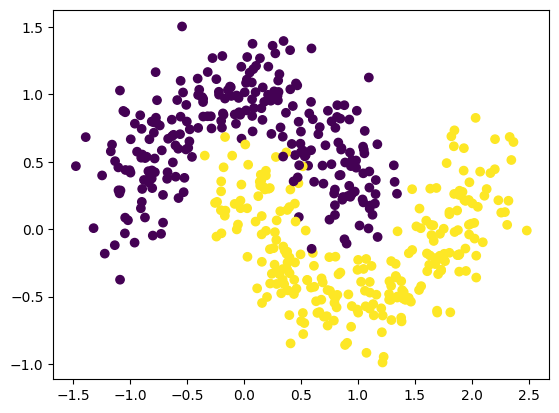

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

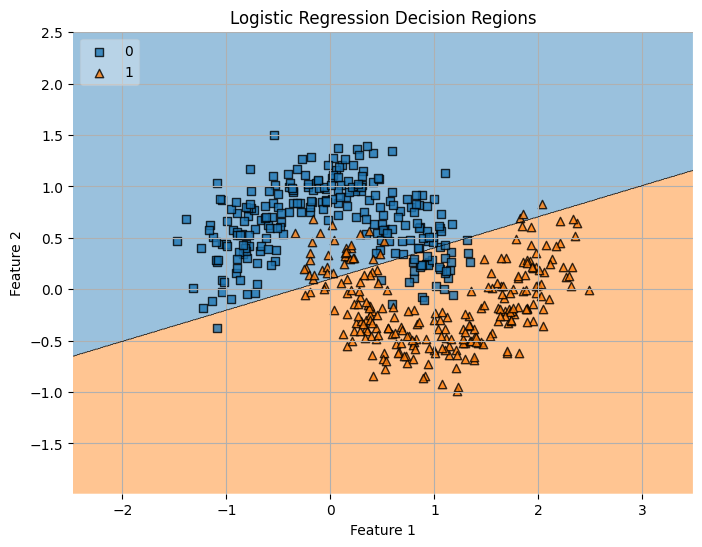

Logistic Regression accuracy score on moons: 0.85


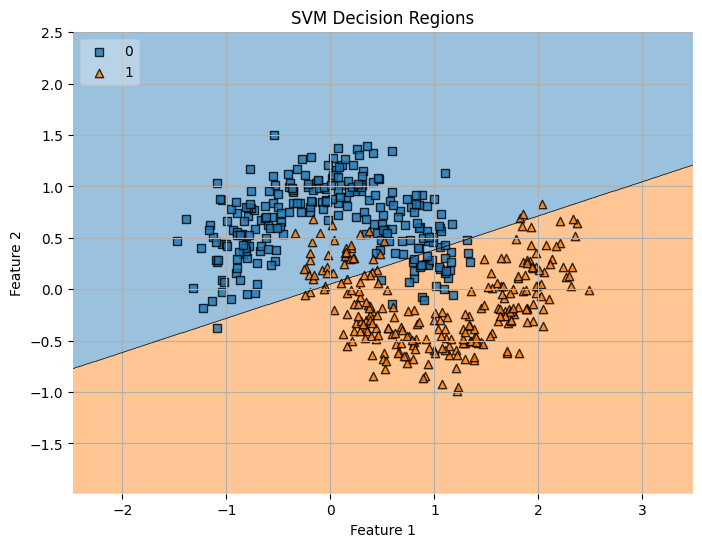

SVM accuracy score on moons: 0.87


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE
lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

def plot_decision_boundaries(X, y, estimator, title='Decision Regions', figsize=(8, 6)):
    plt.figure(figsize=figsize)
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Function to print accuracy score
def evaluate_model(estimator, dataset_name='moons', estimator_name='Estimator'):
    test_points, test_labels = make_moons(n_samples=100, noise=0.2, random_state=42)
    pred_labels = estimator.predict(test_points)
    accuracy = accuracy_score(test_labels, pred_labels)
    print(f"{estimator_name} accuracy score on {dataset_name}: {accuracy:.2f}")

# Plot and evaluate logistic regression
plot_decision_boundaries(X=moons_points, y=moons_labels, estimator=lr, title='Logistic Regression Decision Regions')
evaluate_model(estimator=lr, estimator_name='Logistic Regression')

# Plot and evaluate SVM
plot_decision_boundaries(X=moons_points, y=moons_labels, estimator=svm, title='SVM Decision Regions')
evaluate_model(estimator=svm, estimator_name='SVM')

Логистическая регрессия будет определять линейные границы принятия решений на основе глобального разделения классов.
SVM (линейное ядро) также будет определять линейные границы принятия решений, но используют максимизацию разницы между ближайшими точками разных классов.

Как мы видим из диаграмм Логистическая регрессия и SVM с линейным ядром работает аналогично для линейно разделяемых данных и показатель accurancy сравнительно одинаковы

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

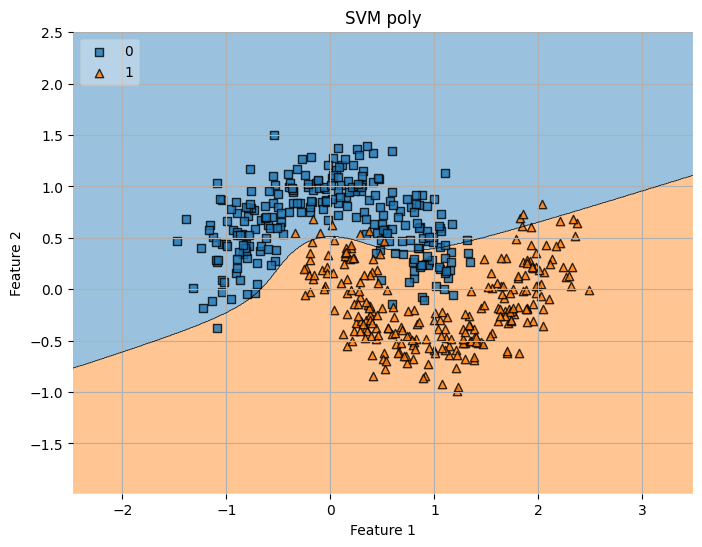

Estimator accuracy score on SVM poly: 0.87


In [8]:
### YOUR CODE HERE
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(moons_points, moons_labels)
plot_decision_boundaries(X=moons_points, y=moons_labels, estimator=svm_poly, title='SVM poly')
evaluate_model(svm_poly, 'SVM poly')

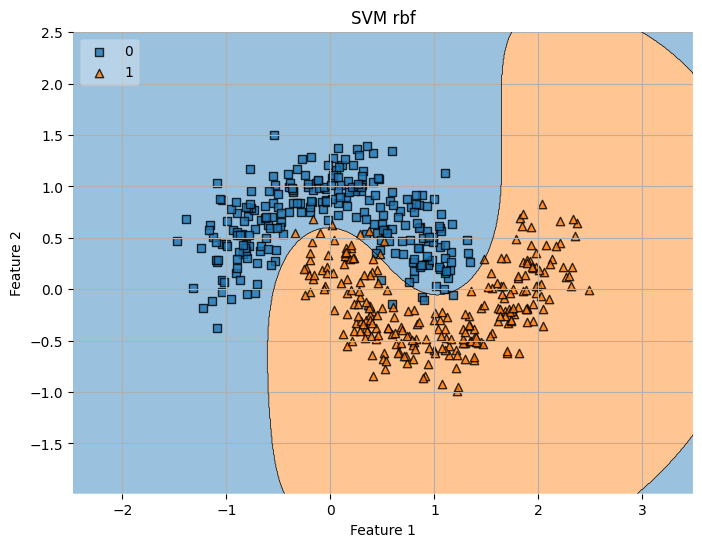

Estimator accuracy score on SVM rbf: 0.97


In [9]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(moons_points, moons_labels)
plot_decision_boundaries(X=moons_points, y=moons_labels, estimator=svm_rbf, title='SVM rbf')
evaluate_model(svm_rbf, 'SVM rbf')

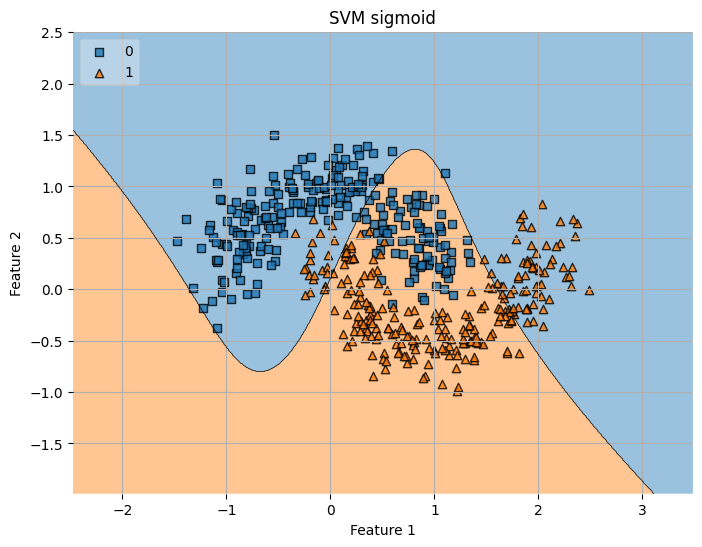

Estimator accuracy score on SVM sigmoid: 0.63


In [10]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(moons_points, moons_labels)
plot_decision_boundaries(X=moons_points, y=moons_labels, estimator=svm_sigmoid, title='SVM sigmoid')
evaluate_model(svm_sigmoid, 'SVM sigmoid')

1) RBF Kernel: Обеспечивает наилучшее представление при работе со сложными нелинейными наборами данных благодаря своей способности отображать данные в более высокие размерности.

Polynomial Kernel: Представление зависит от параметра degree. Более высокие уровни могут быть избыточными, в то время как более низкие уровни могут быть недостаточными.

Sigmoid Kernel: может работать не так хорошо, если данные не напоминают гиперболическое распределение.

2) Выбор модели:

RBF Kernel: Создает плавные нелинейные границы принятия решений, которые хорошо адаптируются к сложным данным.

Polynomial Kernel: Сложность границ принятия решений возрастает с увеличением степени. Более низкие степени создают более простые, почти линейные границы, в то время как более высокие степени приводят к более сложным схемам.

Sigmoid Kernel: создает изогнутые границы, но может вести себя неустойчиво для плохо масштабируемых данных.

3) Степень 3 была выбрана потому, что она позволяет избежать переобучения, наблюдаемого при более высоких степенях, и в то же время улавливает нелинейные закономерности, пропущенные при более низких степенях.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Estimator accuracy score on polynomial features and logistic regression: 0.95


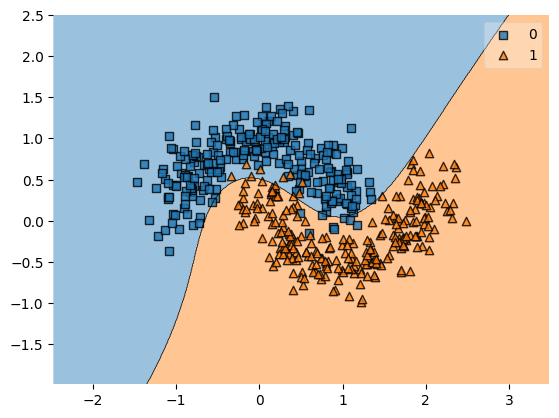

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### YOUR CODE HERE
logReg = LogisticRegression()
poly = make_pipeline(PolynomialFeatures(degree=3), logReg)
poly.fit(moons_points, moons_labels)
plot_decision_regions(X=moons_points, y=moons_labels, clf=poly)
evaluate_model(poly, 'polynomial features and logistic regression')

Логистическая регрессия с полиномиальными features может работать аналогично SVM с полиномиальным ядром, поскольку обе модели моделируют взаимосвязи более высокого порядка в данных, но можно добится более высоких показателей accurancy.
Логистическая регрессия с полиномиальными features создает границы принятия решений, зависящие от степени полинома. Эти границы более плавные и в меньшей степени зависят от параметров ядра по сравнению с SVM.

Была использована степень 3, поскольку она обеспечивает баланс между сложностью и обобщением, что согласуется с параметром степени, используемым в полиномиальном ядре для SVM.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

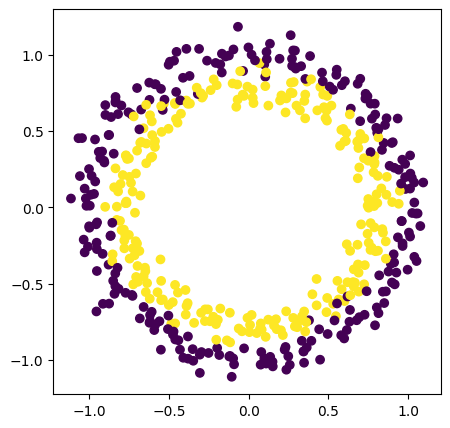

In [16]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

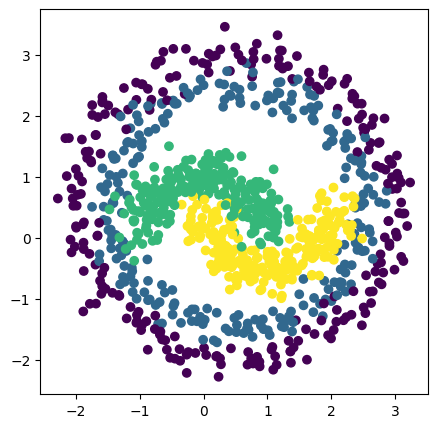

In [17]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


0.921

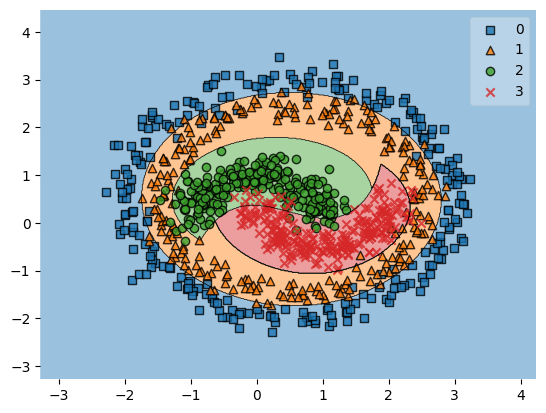

In [21]:
### YOUR CODE HERE
svm = SVC(kernel='rbf')
svm.fit(points, labels)

plot_decision_regions(X=points, y=labels, clf=svm)

accuracy_score(labels, svm.predict(points))



SVM RBF Kernel показал что он эффективно справляется с нелинейными зависимостями.Он лучше работает с более сложными данными по сравнению с логистической регрессией с полиномиальными features.